# Chapter 3: Undirected graphs

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import voronoi_plot_2d, Voronoi
import numpy as np
%matplotlib inline

## Some essential data structures in python

Using the correct datastructure is key to implementing an efficient graph algorithm. Below is a concise overview of some elementary python data structures.

For more information on the time complexity of operations on these data structures, see [this](https://wiki.python.org/moin/TimeComplexity) link.

### Lists: ordered  collection of objects

Lists store objects in sequential order. Adding and removing elements at the back is easy, inserting or removing elements elsewhere is computationally inefficient (memory has to be reshuffled).

In [2]:
my_list = [1, 2, 3, 4, 5]

In [3]:
my_list.append(6)  # add element at the back
my_list

[1, 2, 3, 4, 5, 6]

In [4]:
my_list.pop()  # return last element

6

In [5]:
my_list  # element is gone

[1, 2, 3, 4, 5]

In [6]:
my_list[4]  # take element

5

In [7]:
my_list[3] = 'three'  # replace
my_list

[1, 2, 3, 'three', 5]

In [8]:
# for loops in lists
squares = [x**2 for x in range(1, 11)]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [9]:
# a more complex example
squares_odd = [x**2 for x in range(1, 11) if x%2==1]
squares_odd

[1, 9, 25, 49, 81]

### Sets: unordened collection of objects

Sets have no ordening and cannot contain duplicates. It is very efficient (constant time compelxity) to check if an element is present and to add or remove an object.

In [10]:
numbers = set([1, 2, 15, -1, 4, 2, 3, 4])  # make set from list 
numbers  # no particular order or duplicates

{-1, 1, 2, 3, 4, 15}

In [11]:
5 in numbers  # check if element is member

False

In [12]:
numbers.add(5)  # add element

In [13]:
5 in numbers

True

In [14]:
# set operations on two sets
new_numbers = set([2, 15, -1, 8, 6, 15])
new_numbers

{-1, 2, 6, 8, 15}

In [15]:
numbers & new_numbers  # intersection (AND)

{-1, 2, 15}

In [16]:
numbers | new_numbers  # union (OR)

{-1, 1, 2, 3, 4, 5, 6, 8, 15}

In [17]:
numbers - new_numbers  # set difference (in first but not in second)

{1, 3, 4, 5}

## Dictionaries: key-value storage

Dictionaries are the best of both lists and sets, they store values by a key

In [18]:
my_dict = {'A' : 1, 'B' : 'bee', 'C' : [1, 2, 3]}  # make dictionary

In [19]:
my_dict['B']  # get value associated by key

'bee'

In [20]:
my_dict['D'] = 'new value'  # add new key-value
my_dict

{'A': 1, 'B': 'bee', 'C': [1, 2, 3], 'D': 'new value'}

In [21]:
'A' in my_dict  # check if dict has key

True

In [22]:
for k, v in my_dict.items():  # iterate over values
    print(k, v)

A 1
B bee
C [1, 2, 3]
D new value


In [23]:
for k in my_dict.keys():  # iterate over keys
    print(k)

A
B
C
D


In [24]:
for v in my_dict.values():  # iterate over values
    print(v)

1
bee
[1, 2, 3]
new value


## Representing graphs in python

Consider the following example graph:

Typically, graphs are represented as:
- **list of edges**: a set of edges (tuples of vertices) we use sets are there is no order in the edges. THis is the prefered format to *store* graphs.
- **adjacency lists**: in python implemented as dictionaries. Each vertex is a key and the associated value is a set of neighboring edges (for undirected graphs every outgoing edge should be balanced by an ingoing edge).
- **adjacenty matrices**: matrix of which the elements store the edges. Is only used for dense graphs.

Example of the theory:

![](Figures/undir_graph.png)

In [25]:
edges = set([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('C', 'E'), ('D', 'E')])

In [26]:
from graphs import edges_to_adj_list

In [27]:
adj_list = edges_to_adj_list(edges)
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

Some basic graph algorithms are implemented:
- `give_connected_component`: gives the largest connected component for a vertex
- `is_connected`: checks if a graph is connected (every edge can be reached from every other edge)
- `has_path`: checks if there exists a path between two vertices
- `is_bridge`: checks if an edge is a bridge (i.e. removing it makes the graph disconnected

Run the examples and check the result

In [28]:
from graphs import give_connected_component, is_connected, is_bridge, has_path

In [29]:
example1_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C'), ('D', 'E'),
                     ('E', 'F'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])
example2_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'),
                     ('D', 'G'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])

In [30]:
example1_adj_list = edges_to_adj_list(example1_edges)
example2_adj_list = edges_to_adj_list(example2_edges)

print(example1_adj_list)
print(example2_adj_list)

{'A': {'C', 'B'}, 'C': {'A', 'B', 'D'}, 'G': {'F', 'E'}, 'E': {'G', 'F', 'D'}, 'D': {'C', 'F', 'E'}, 'B': {'C', 'A'}, 'F': {'G', 'D', 'E'}}
{'A': {'C', 'B'}, 'C': {'A', 'B'}, 'G': {'F', 'D', 'E'}, 'E': {'G', 'D'}, 'B': {'C', 'A'}, 'D': {'G', 'F', 'E'}, 'F': {'G', 'D'}}


In [31]:
give_connected_component(example1_adj_list, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [32]:
give_connected_component(example2_adj_list, 'A')

{'A', 'B', 'C'}

In [33]:
is_connected(example1_adj_list)

True

In [34]:
is_connected(example2_adj_list)

False

In [35]:
is_bridge(example1_adj_list, ('A', 'B'))

False

In [36]:
is_bridge(example1_adj_list, ('C', 'D'))

True

In [37]:
example1_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D'},
 'D': {'C', 'E', 'F'},
 'E': {'D', 'F', 'G'},
 'F': {'D', 'E', 'G'},
 'G': {'E', 'F'}}

In [38]:
has_path(example2_adj_list, 'A', 'C')

True

In [39]:
has_path(example2_adj_list, 'A', 'F')

False

In [40]:
example2_adj_list["A"].remove('B')
example2_adj_list

{'A': {'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B'},
 'D': {'E', 'F', 'G'},
 'E': {'D', 'G'},
 'F': {'D', 'G'},
 'G': {'D', 'E', 'F'}}

## Fleury's algorithm

Fleury's algorithm is a simple (though inefficient algorithm to find an Eulerian trail (i.e. a walk on the graph that passes all the edges).

It can be shown that a graph has an Eulerian trail if and only if it is connected and it it has exactly zero or two edges with an odd degree.

Fleury's algorithm is executed as follows:
1. Start at a vertex of odd degree, or, if the graph has none, start with an arbitrarily chosen vertex.
2. Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge), unless there is no such edge, in which case pick the remaining edge left at the current vertex.
3. Add the edge to the path and remove the edge from the graph.
4. Repeat steps 2-3 until no more edges are left.

**ASSIGNMENT 1**

1. Complete the pseudocode of fleury's algorithm. The algorithm first checks if an Eulerian path exists (and returns None if not) and returns the path as a list. Use the given function `is_bridge` to check if an 
2. Study the time complexity of the algorithm. For this you have 25 graphs at your disposal. These graphs are stored in json format in the form `eulerianxxx.json` with '`xxx`' the number of edges. The function `load_graph` can read this data file (see example). For each file, measure the time to find the Eulerian path and make a graph (in log-log scale) of the time vs. the number of edges. Comment on the relation (linear time complexity, super/sublinear?) Does this make sense? HINT: detecting if an edge is a bridge is done with an average time complexity linear in the number of edges.

In [41]:
def fleury_algorithm(adj_list):
    """
    Fleury's algorithm for finding an Eulerian path (if one exists)
    
    First it checks if the path exists, if it exists, it returns a list of
    the nodes that are visisted in an Eulerian path
    
    Inputs:
        - adj_list 
    Outputs:
        - path
    """
    adj_list = {k : v.copy() for k, v in adj_list.items()}  # make a copy
    
    #We'll store the traversed path in a list
    path = []
    
    # check if Eulerian path exists: there should be only 0 or 2 odd degree nodes AND graph should be fully connected
    #count number of nodes with odd degree and remember which these are (if any)
    number_of_odd_vertices = 0
    odd_vertices_list = []
    for v in adj_list.keys():
        if len(adj_list[v])%2 ==1:
            number_of_odd_vertices += 1
            odd_vertices_list.append(v)
            
    #check if the two requirements are fulfilled for an Eulerian path to exist
    if not ( (is_connected(adj_list)==True) and (number_of_odd_vertices==0 or number_of_odd_vertices==2) ):
        # if Eulerian path doesn't exist, return None
        return None
        
    # if the requirements are fullfilled, compute the Eulerian path and return it   
    else:
        #Start at a vertex of odd degree.
        if number_of_odd_vertices==2:
            start_node = odd_vertices_list[0]
        #if the graph has none, start with an arbitrarily chosen vertex.
        else:
            start_node = random.sample(adj_list.keys(), 1)
    
    #add start node to the path
    path.append(start_node)
    current_node = start_node
    
    #keep moving through graph until current node has no more edges to move through
    while len(adj_list.keys()) != 0:            
        possible_edges = adj_list[current_node]
        
        #Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge)
        #unless there is no such edge, in which case pick the remaining edge left at the current vertex.
        if len(possible_edges) == 1:
            next_node = next(iter(possible_edges))  #possible_edges.pop()
        else:
            for x in possible_edges:
                if not is_bridge(adj_list, [x, current_node]):
                    next_node = x
                    break
        
        #Add the node to the path 
        path.append(next_node)
        
        #Remove the edge from the graph
        adj_list[current_node].remove(next_node)
        adj_list[next_node].remove(current_node)
        
        
        #remove node if it has no more edges
        if len(adj_list[current_node]) == 0:
            del adj_list[current_node]
        if len(adj_list[next_node]) == 0:    
            del adj_list[next_node]
            
        current_node = next_node
        
    return path

In [42]:
fleury_algorithm(adj_list)

['C', 'B', 'A', 'D', 'C', 'E', 'D']

In [43]:
from graphs import load_graph

In [44]:
# example on how to load the graph
adj_loaded = load_graph('Data_Eulerian/eulerian14.json')
adj_loaded

{'0': {'3', '4'},
 '1': {'3', '4'},
 '2': {'3', '4', '6', '8', '9'},
 '3': {'0', '1', '2', '4', '8', '9'},
 '4': {'0', '1', '2', '3', '8'},
 '6': {'2', '8'},
 '8': {'2', '3', '4', '6'},
 '9': {'2', '3'}}

In [45]:
# measure the time to find the Eulerian path for each graph

#get list with number of edges for each graph
graphs = [14, 26, 46, 74, 110, 154, 206, 266, 334, 410, 494, 586, 686, 794, 910, 1034, 1166, 1306, 1454, 1610, 1774, 1946, 2126, 2314, 2510]

if __name__=='__main__':
    from timeit import Timer
    timings = []
    #for each graph, get the time
    for x in graphs:
        #create filename and load graph
        name_file = "Data_Eulerian/eulerian%s.json" %x
        loaded_graph = load_graph(name_file)
        #get the time and add it to the list
        t = Timer(lambda: fleury_algorithm(loaded_graph))
        time_current_graph = (t.timeit(number=1))
        timings.append(time_current_graph)


print(timings)    
print(sum(timings))

[0.0004427383905969644, 0.0006386816193121644, 0.0016944423968895412, 0.004174057303130706, 0.005728540250937962, 0.009878337916227737, 0.02610663603731879, 0.026741118873158477, 0.038793960096627986, 0.057973069935870564, 0.08519471625087827, 0.11750062281954843, 0.15352431888734103, 0.204170045132257, 0.2716734204876373, 0.3567440393603294, 0.42872145177137333, 0.5261290295491721, 0.7126851780144232, 0.7824740911733175, 0.9631398129581918, 1.1063467877906836, 1.299826263670539, 1.6398512137749952, 2.0092144635960807]
10.829367038056839


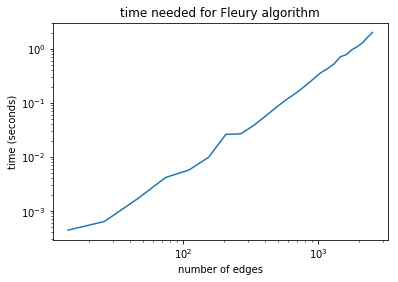

In [46]:
# use this cell to plot the time as a function of the number of edges (log-log scale)

#plot number of edges versus the time needed to complete the Fleury algorithm
plt.plot(graphs, timings)
#log-log scale
plt.xscale('log')
plt.yscale('log')
#add title and label axis
plt.title('time needed for Fleury algorithm')
plt.xlabel('number of edges')
plt.ylabel('time (seconds)')

**EMPIRICAL TIME COMPLEXITY**

Looking at the graph we see that it's (more or less) a straight line. Because this is a log-log plot, this indicates the time complexity takes the form of a monomial equation (which is a polynomial equation with only one term).

Monomial equations are of the form y=ax^k with 'a' a constant term that defines the intercept of the line on the graph and 'k' determining the slope. So, the slope of the line on the graph indicates the degree of the monomial equation.

After estimating the slope of the log-log graph a few times by rerunning the algorithm (see http://www.dgp.toronto.edu/people/JamesStewart/378notes/05logLog/) it seems the degree of the equation is almost 2. 

Detecting if an edge is a bridge has linear time complexity. We rerun the is_bridge function every time we move from one node to another and delete the edge (except if there's only 1 edge left). This implies that the time complexity would be O(E^2), with E the number of edges.

This means the algorithm has superlinear time complexity. 

## Graph coloring using six colors

Graph coloring is an optimization problem of assinging a color to each label using as few colors as possible such that no neighboring vertices have the same color.

The four color theorem states that a planar graph can be colored using only four colors.

We will use six colors (though we rarely need more than five) to color a planar graph. For this, the algorithm is very simple:

1. Color recursively with the six colors all vertices of degree five or more.
2. Color the rest of the graph with a free color.

**ASSIGNMENT 2**

1. Complete the graph coloring algorithm.
2. What do you think the time complexity of this algorithm is going to be (based on reasoning).

You can illustrate this algorithm on a Voronoi plot (a tesselation of a plane based on the distance to a set of points). Feel free to improve the graphics :-)

In [47]:
def graph_color(adj_list, colors=['k', 'r', 'b', 'g', 'y', 'm']):
    """
    Provides one of six colors for each vertex in a planar graph
    such that no neighboring vertices have the same color
    
    Inputs:
        - adj_list: adjecency list of a planar graph
        - colors: list of six colors (default those for matplotlib plotting)
    Output:
        - vertices_colors: a dict with a color for each vertex
        keys = vertices, each value is its color
    """
    
    vertices_colors = {}
    
    #step 1: Color recursively with the six colors all vertices of degree five or more.
    
    #Go down the dict, check for each entry what degree it has
    for k, v in adj_list.items():  # iterate over all the dictionary items (key and value)        
        degree_current_node = len(v)

        #color node if it has degree 5 or more
        if degree_current_node >=5:
            
            #ensure we use a color not already used by another node of degree >= 5 that's connected to this node
            possible_colors = colors[:]
            #go down the nodes that are connected to the current node, check if any are colored yet
            #if yes: don't pick this color
            #since no nodes of degree < 5 can be colored yet, we don't need to check the degree
            for x in v:
                if x in vertices_colors:
                    invalid_color = vertices_colors[x]
                    #check if the color is still in the list of possible colors (to avoid trying to remove a color that was removed already)
                    if invalid_color in possible_colors:
                        possible_colors.remove(invalid_color)
                        
            #pick a random color from the remaining colors
            color_current_node = np.random.choice(possible_colors)         
            vertices_colors[k] = color_current_node
            
    
    #step 2: Color the rest of the graph with a free color.
    
    for k, v in adj_list.items():       
        #check if the node isn't colored already
        if not k in vertices_colors:
        
            #ensure we use a color not already used by another node that's connected to it
            possible_colors = colors[:]
            #go down the nodes that are connected to this one, check if any are colored yet
            #if yes: don't pick this color
            for x in v:
                if x in vertices_colors:
                    invalid_color = vertices_colors[x]
                    if invalid_color in possible_colors:
                        possible_colors.remove(invalid_color)
            
            color_current_node = np.random.choice(possible_colors)         
            vertices_colors[k] = color_current_node 
    
    return vertices_colors

In [48]:
from graphs import get_planar_graph

In [49]:
X = np.random.randn(20, 2)  # random points for Voronoi tesselation
planar_graph = get_planar_graph(X)

In [50]:
coloring = graph_color(planar_graph, colors=['k', 'r', 'b', 'g', 'y', 'm'])
coloring

{0: 'r',
 1: 'm',
 2: 'y',
 3: 'g',
 4: 'g',
 5: 'm',
 6: 'b',
 7: 'g',
 8: 'r',
 9: 'k',
 10: 'k',
 11: 'm',
 12: 'y',
 13: 'y',
 14: 'b',
 15: 'k',
 16: 'g',
 17: 'b',
 18: 'r',
 19: 'b'}

C:\Users\Robin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:17: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
C:\Users\Robin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)
C:\Users\Robin\Anaconda3\lib\site-packages\scipy\spatial\_plotutils.py:22: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(was_held)


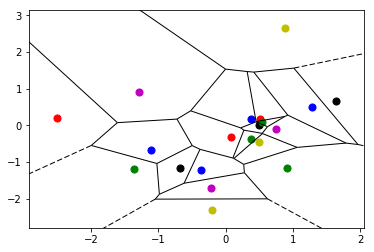

In [51]:
fig, ax = plt.subplots()

vor = Voronoi(X)

voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False)
for i, c in coloring.items():
    ax.scatter(X[i, 0], X[i, 1], c=c, s=50)

**TIME COMPLEXITY**

I suspect the time complexity of this algorithm will be linear. This is because assigning a color to each of the nodes essentially requires going over all of the nodes in the list once (first coloring nodes of degree 5 or more) and checking for each what colors are already used for the nodes it has an edge to. 